# Regression HW 1
> 고급회귀분석 과제, CH03, CH04

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Advanced Regression Analysis]

---

과제1

**풀이** :

R 이용하지 않고 직접 계산. (R로 단순 계산은 해도 됨)

모든 문제에는 풀이가 있어야 함.

풀이 없이 답만 있는 경우 '0'점 처리.

 

- 제출 기한 : 10월 03일

**제출 방법** : 

직접 제출 (607호) 또는 스캔, 사진, tex 작업, 문서 작업 등 후 pdf로 변환 후 제출

pdf 아닌 경우 미제출 처리

---

1. 원점을 지나는 회귀모형은 다음과 같이 정의할 수 있다.
$$y_i =β_1x_i +ε_i, ε_i ∼_{i.i.d.} N(0,σ^2), i=1,...,n$$
오차제곱합을 정의하고 $β_1$ 의 최소제곱추정량 ($\hat{β}_1$)을 구하여라.

**Answer**

$SSE = \sum(y_i - \hat{y_i})^2 = \sum(y_i - \hat{\beta_1}x_i)^2$

$SSE' = 0 = \sum(-x_i)2(y_i - \hat{\beta_1}x_i )$

$\sum(-x_iy_i) + \sum(x_i^2\hat{\beta_1}) = 0$

$\hat{\beta_1} = \frac{\sum(x_iy_i)}{\sum(x_i^2)}$

2. 자동차의 무게가 무거우면 이를 움직이는 데 더 많은 연료가 소모된다는 것은 알려진 사실이다. 자동차의 무게와 자동차를 1km 움직이는 데 필요한 에너지량과의 함수관계를 정확히 판단하기 위하여 A 자동차회사는 다음의 자료를 실험을 통하여 얻었다. 실험 비용이 많이 드는 관계로 9번만 실험하였다.

|무게 X(단위: 1,000kg)|에너지소모량 Y(단위: 1,000btu)|
|:---:|:---:|
|0.9|2.0|
|1.3|2.6|
|2.1|4.3|
|2.5|5.8|
|2.4|5.1|
|1.7|3.2|
|0.7|1.8|
|1.2|2.3|
|1.6|3.0|

(1) 이 데이터의 산점도를 그리시오.

In [1]:
dt <- data.frame(x = c(0.9,1.3,2.1,2.5,2.4,1.7,0.7,1.2,1.6),
                 y = c(2.0,2.6,4.3,5.8,5.1,3.2,1.8,2.3,3.0))
dt

x,y
<dbl>,<dbl>
0.9,2.0
1.3,2.6
2.1,4.3
2.5,5.8
2.4,5.1
1.7,3.2
0.7,1.8
1.2,2.3
1.6,3.0


**Answer**

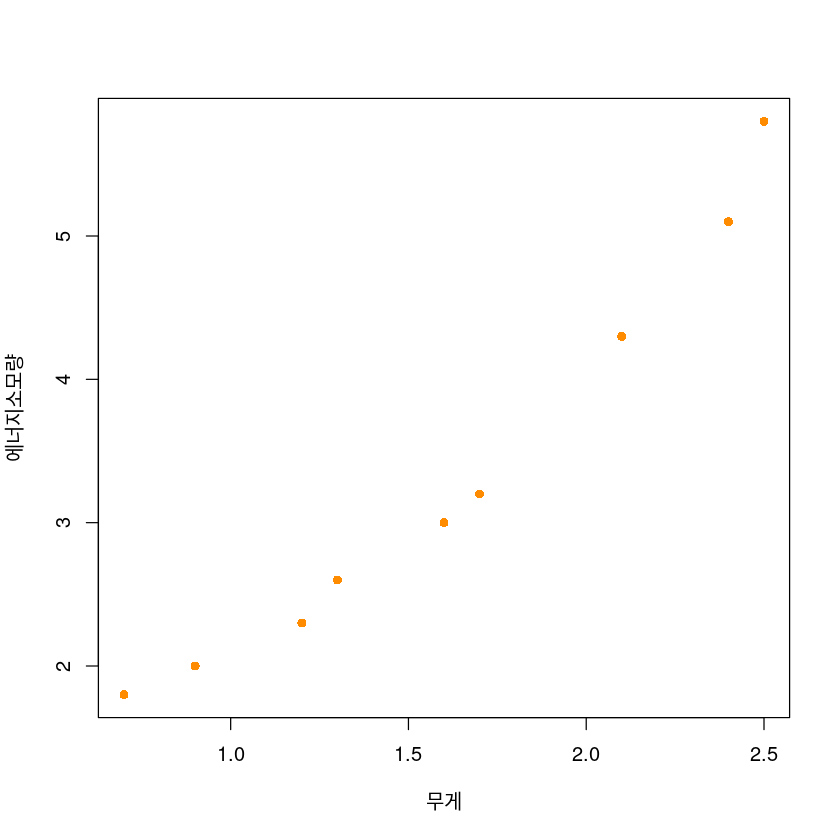

In [2]:
plot(y~x, 
     data = dt,
     xlab = "무게",
     ylab = "에너지소모량",
     pch  = 16,
     cex  = 1,
     col  = "darkorange")

- 양의 상관관계가 있어보인다.
- 무게가 커질수록 에너지소모량도 큰 경향이 보이기 때문이다.
- 우상향의 모양이라, 단순상관선형 적용해보면 되겠다.

(2) 최소제곱법의 의한 회귀직선을 적합시키시오.

**Answer**

In [3]:
dt1 <- data.frame(
  i = 1:nrow(dt),
  x = dt$x,
  y = dt$y,
  x_barx = dt$x - mean(dt$x),
  y_bary = dt$y - mean(dt$y)) 

- $S_{xx}, S_{yy},S_{xy}$를 구해주기 위해 $x_i - \bar{x}, y_i - \bar{y}$를 구했다.

In [4]:
dt1$x_barx2 <- dt1$x_barx^2
dt1$y_bary2 <- dt1$y_bary^2
dt1$xy <-dt1$x_barx * dt1$y_bary

- $S_{xx}, S_{yy},S_{xy}$를 구해주었다.

In [5]:
dt1

i,x,y,x_barx,y_bary,x_barx2,y_bary2,xy
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.9,2.0,-0.7,-1.3444444,0.49,1.8075309,0.94111111
2,1.3,2.6,-0.3,-0.7444444,0.09,0.5541975,0.22333333
3,2.1,4.3,0.5,0.9555556,0.25,0.9130864,0.47777778
4,2.5,5.8,0.9,2.4555556,0.81,6.0297531,2.21000000
5,2.4,5.1,0.8,1.7555556,0.64,3.0819753,1.40444444
6,1.7,3.2,0.1,-0.1444444,0.01,0.0208642,-0.01444444
7,0.7,1.8,-0.9,-1.5444444,0.81,2.3853086,1.39000000
8,1.2,2.3,-0.4,-1.0444444,0.16,1.0908642,0.41777778
9,1.6,3.0,0.0,-0.3444444,0.00,0.1186420,0.00000000


- 반올림 해주었다.

In [6]:
round(colSums(dt1),3)

i       x       y  x_barx  y_bary x_barx2 y_bary2      xy 
 45.000  14.400  30.100   0.000   0.000   3.260  16.002   7.050

$\hat{\beta_1} = \frac{S_{xy}}{S_{xx}}$

$\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$

In [7]:
beta1 <- as.numeric(colSums(dt1)[8]/colSums(dt1)[6])
beta0 <- mean(dt$y) - beta1 *  mean(dt$x)

In [8]:
cat("hat beta0 = ", beta0)
cat("hat beta1 = ", beta1)

hat beta0 =  -0.1156783hat beta1 =  2.162577

- $\hat{y} =  -0.1156783 +  2.162577x$의 모형으로 적합되었다.

(3) 데이터의 산점도를 그리고 추정한 회귀직선을 (1)에서 그린 산점도 위에 그리시오.

**Answer**

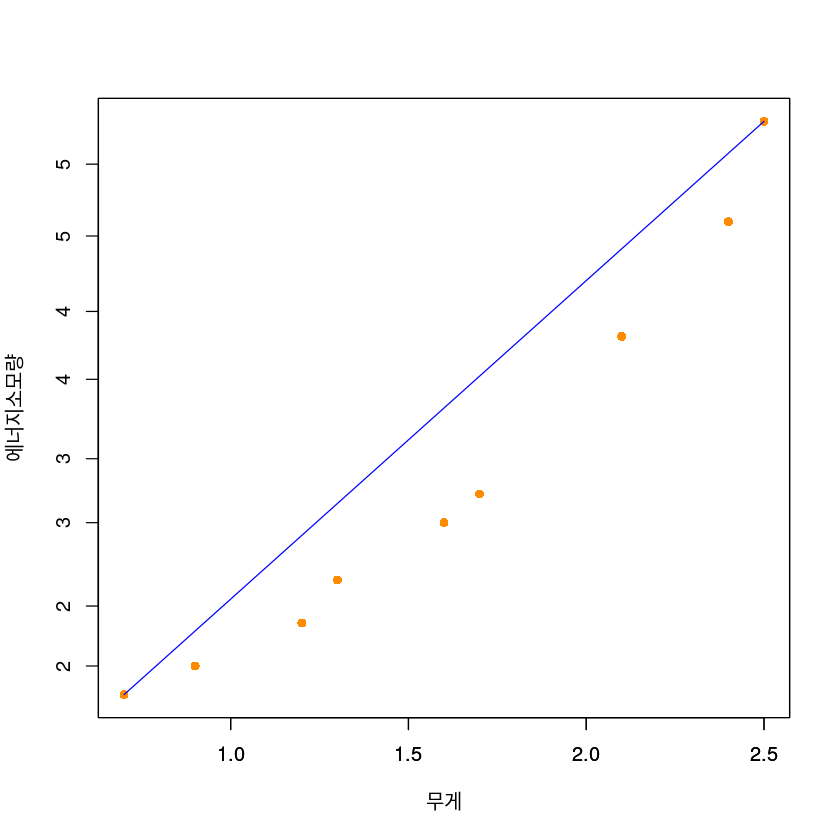

In [9]:
plot(y~x, 
     data = dt,
     xlab = "무게",
     ylab = "에너지소모량",
     pch  = 16,
     cex  = 1,
     col  = "darkorange")
par(new=TRUE)
plot(-0.1156783 +  2.162577*x~x,
     data = dt,
     xlab = "",
     ylab = "",
     pch  = 16,
     cex  = 1,type='l',
     col  = "blue")

- 추정한 회귀직선을 그려보니 오차가 클 것처럼 y와 $\hat{y}$가 떨어진 값이 많아보인다.

(4) 결정계수와 상관계수를 구하시오.

$r_{xy} = \frac{S_{xy}}{\sqrt{S_{xx}S_{yy}}}$

In [10]:
rxy = colSums(dt1)[8]/sqrt(colSums(dt1)[6]*colSums(dt1)[7])
rxy

xy 
0.9760907

- 상관계수는 약 98% 로, $x,y$간 높은 양의 상관관계가 있었다.

$R^2 = \frac{SSR}{SST} = r^2$

In [11]:
SST = sum((dt$y - mean(dt$y))^2)

In [12]:
SSR = sum( ( (-0.1156783 +  2.162577*dt$x)-mean(dt$y) )^2 )

In [13]:
SSE = sum( ( dt$y-(-0.1156783 +  2.162577*dt$x))^2 )

In [14]:
cat("SST = ", SST)
cat("\nSSR = ", SSR)
cat("\nSSE = ", SSE)

SST =  16.00222
SSR =  15.24617
SSE =  0.7560566

In [15]:
SSR/SST

[1] 0.9527533

In [16]:
rxy**2

xy 
0.952753

- 결정계수는 약 95%로, 설명력도 높은 편이라고 말할 수 있지만, 결정계수는 다른 모델과 비교할때 언급되는 것이 적절하다.

(5) 분산분석표를 작성하고 회귀직선의 유의 여부를 검정하시오 (유의수준 $α = 0.05$ 사용).

In [17]:
MSR = SSR/1
MSE = SSE/7

In [18]:
cat("MSR = ", MSR)
cat("\nMSE = ", MSE)

MSR =  15.24617
MSE =  0.1080081

In [19]:
Fvalue = MSR/MSE

In [20]:
cat("F value = ",Fvalue)

F value =  141.1577

In [21]:
cat("p value = ",df(Fvalue,1,7))

p value =  1.614709e-07

||df|sum of square|mean of square| F value| p value|
|:---:|:---:|:---:|:---:|:---:|:---:|
|x|1|15.24617|15.24617|141.1584|1.614672e-07|
|Residuals|7|0.7560522|0.1080075|||

- F값은 141.1584, p value는 1.614672e-07가 나왔다.
- 유의수준 5%에서 모형이 유의하다는 것을 알 수 있었다.

(6) $β_0,β_1$ 에 대한 90% 신뢰구간을 구하시오.

**Answer**

$$\hat{\beta_0} \pm t_{(\alpha/2,n-2)}\hat{\sigma} \sqrt{\frac{1}{n} + \frac{\bar{x}^2}{S_{xx}}}$$

In [22]:
cat("Beta0 confidence level",beta0 + qt(0.025, 7) * sqrt((MSE)*(1/9 + mean(dt$x)^2/sum((dt$x - mean(dt$x))^2))),"~",beta0 + qt(0.975, 7) * sqrt((MSE)*(1/9 + mean(dt$x)^2/sum((dt$x - mean(dt$x))^2))))

Beta0 confidence level -0.8514415 ~ 0.620085

$$\hat{\beta_1} \pm t_{(\alpha/2,n-2)} \sqrt{\frac{MSE}{S_{xx}}}$$

In [23]:
cat("Beta1 confidence level",beta1 + qt(0.025, 7) * sqrt((MSE)/sum((dt$x - mean(dt$x))^2)),'~',beta1 + qt(0.975, 7) * sqrt((MSE)/sum((dt$x - mean(dt$x))^2)))

Beta1 confidence level 1.732168 ~ 2.592986

- $\beta_0$의 신뢰구간은 0을 포함하였다.($H_0 : \beta_0=0$ 채택)
- $\beta_1$의 신뢰구간은 0을 포함하지 않았다.($H_0 : \beta_1=0$ 기각)
- 신뢰구간으로 신뢰구간에 0이 포함된 $\beta_1$ 계수만 유의미하다는 것을 알 수 있다.

(7) $H_0 :β_1 =1$ vs. $H_1 :β_1  \ne 1$의 가설검정을 유의수준 $α=0.1$에서 수행하시오.

$$\text{t value} = \frac{\hat{\beta_1} - 1}{s.e(\hat{\beta_1})}$$

In [24]:
Tvalue = (beta1 - 1)/(sqrt((MSE/sum((dt$x - mean(dt$x))^2))))

In [25]:
Tvalue

[1] 6.387079

In [26]:
-Tvalue

[1] -6.387079

In [27]:
qt(0.95,7)

[1] 1.894579

In [28]:
qt(0.05,7)

[1] -1.894579

- 구힌 t value = 6.39가 유의수준 $\alpha = 0.1$ 에서의 t value = 1.89보다 크기 때문에 유의하다는 결과가 나와 귀무가설을 기각한다.
- 따라서 $\beta_1$은 1이 아니다.

figure로 표현

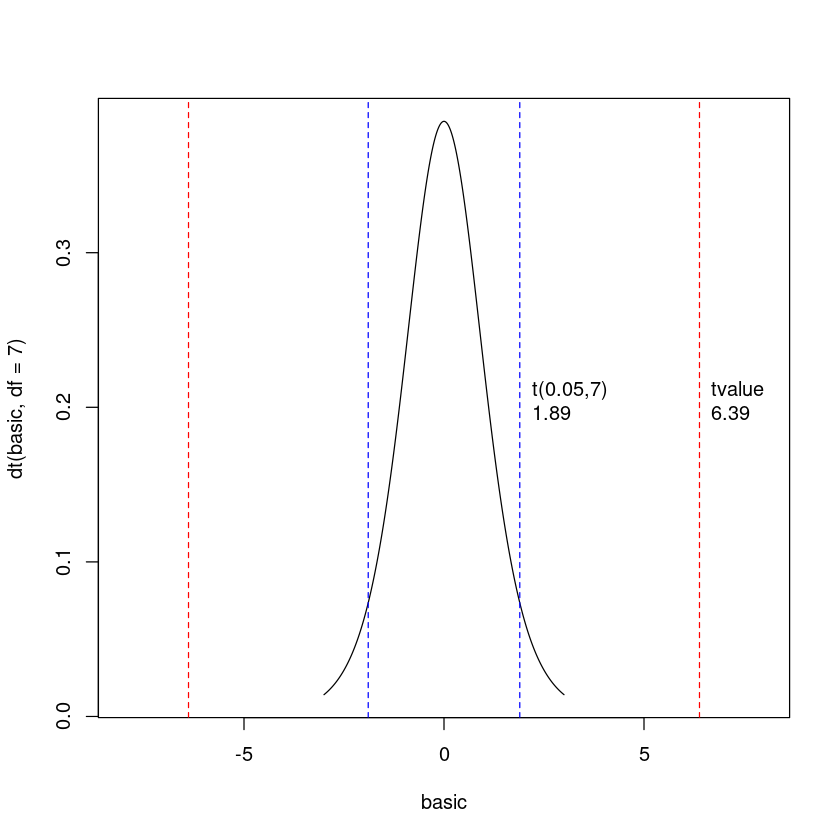

In [29]:
par(mfrow=c(1,1))
basic <- seq(-3,3,by=0.01)
plot(basic,dt(basic,df=7),type="l",xlim=c(-8,8))
abline(v=Tvalue,col="red",lty=2)
abline(v=qt(0.95,7),col="blue",lty=2)
text(x=Tvalue, y=c(0.2), labels=c("tvalue\n6.39"), pos=4, col="black")
text(x=qt(0.95,7), y=c(0.2), labels=c("t(0.05,7)\n1.89"), pos=4, col="black")
abline(v=-Tvalue,col="red",lty=2)
abline(v=qt(0.05,7),col="blue",lty=2)

(8) 무게가 3,000kg 이 되는 차량의 평균 에너지 소모량을 예측하시오. 이것은 무게가 1,000kg이 되는 차량의 에너지 소모량의 몇 배인가?

$$\hat{\mu}_0 = \hat{\beta_0} + \hat{\beta_1} x_0$$

In [30]:
cat("평균 에너지 소모량 = ",beta0 + beta1 * 3)

평균 에너지 소모량 =  6.372052

In [31]:
cat("무게가 3,000kg 이 되는 차량의 평균 에너지 소모량을 예측해보니 무게가 1,000kg이 되는 차량의 에너지 소모량의",(beta0 + beta1 * 3)/(beta0 + beta1 * 1),"배 였다.")

무게가 3,000kg 이 되는 차량의 평균 에너지 소모량을 예측해보니 무게가 1,000kg이 되는 차량의 에너지 소모량의 3.113028 배 였다.

(9) 무게가 3,000kg 이 되는 차량의 평균 에너지 소모량과 하나의 개별 $y$ 값의 90% 신뢰구간을 각각 구하시오.

**Answer**

In [32]:
cat("무게가 3,000kg 이 되는 차량의 평균 에너지 소모량은",beta0 + beta1 * 3,"이다.")

무게가 3,000kg 이 되는 차량의 평균 에너지 소모량은 6.372052 이다.

$$\hat{Var(\hat{\mu}_0}) = \sigma (\frac{1}{n} + \frac{(x_0 - \bar{x})^2}{S_{xx}})$$

In [33]:
sigma = MSE

In [34]:
mean(dt$x)

[1] 1.6

$S_{xx}$

In [35]:
sum((dt$x - mean(dt$x))^2)

[1] 3.26

In [36]:
colSums(dt1)[6]

x_barx2 
   3.26

$\hat{Var(\hat{\mu_0})}$

In [37]:
sqrt(sigma)*(1/9 + (3-1.6)^2/3.26)

[1] 0.2341069

In [38]:
cat("hat var(hat mu zero) = ",sqrt(sigma)*(1/9 + (3-1.6)^2/3.26))

hat var(hat mu zero) =  0.2341069

$\hat{\sigma}_{\hat{\mu_0}}$

In [39]:
sqrt(sqrt(sigma)*(1/9 + (3-1.6)^2/3.26))

[1] 0.483846

In [40]:
cat("hat sigma(hat mu zero) = ", sqrt(sqrt(sigma)*(1/9 + (3-1.6)^2/3.26)))

hat sigma(hat mu zero) =  0.483846

$\hat{\mu_0} \pm t_{(\alpha/2,(n-2))}\hat{\sigma_{\hat{\mu_0}}}$

In [41]:
6.372052 + qt(0.95,7)*sqrt(sqrt(sigma)*(1/9 + (3-1.6)^2/3.26))

[1] 7.288736

In [42]:
6.372052 - qt(0.95,7)*sqrt(sqrt(sigma)*(1/9 + (3-1.6)^2/3.26))

[1] 5.455368

In [43]:
cat("개별 y값의 90% 신뢰구간은 (",5.4553690631157,"~",7.2887349368843,") 이다.")

개별 y값의 90% 신뢰구간은 ( 5.455369 ~ 7.288735 ) 이다.

(10) 잔차 $e_i = y_i − \hat{y}_i$ 를 구하고 잔차의 합이 0 임을 확인하시오.

**Answer**

In [44]:
epsilon = dt$y - (beta0 + beta1*dt$x)

In [45]:
epsilon

[1]  0.16935924 -0.09567144 -0.12573279  0.50923654  0.02549421 -0.36070211
[7]  0.40187457 -0.17941377 -0.34444444

In [46]:
cat("잔차의 합 = ",sum(epsilon))

잔차의 합 =  8.881784e-16

합이 0인 것을 확인했다.

(11) 잔차들의 $x_i$ 에 대한 가중합, $\sum x_ie_i$ 를 구하시오.

In [47]:
sum(dt$x * epsilon)

[1] 9.992007e-16

잔차들의 $x_i$ 에 대한 가중합, $\sum x_ie_i$이 0인 것을 확인했다.

(12) 잔차들의 $\hat{y}$에 대한 가중합 $\sum \hat{y}_ie_i$, 를 구하시오.

In [48]:
sum((beta0 + beta1*dt$x)*epsilon)

[1] 1.748601e-15

잔차들의 $\hat{y}$에 대한 가중합 $\sum \hat{y}_ie_i$이 0인 것을 확인했다.

(13) 원점을 지나는 회귀직선을 구하시오.

**Answer**

$\hat{\beta_1} = \frac{\sum(x_iy_i)}{\sum(x_i^2)}$

In [49]:
sum(dt$x * dt$y)/sum((dt$x^2))

[1] 2.09924

In [50]:
beta1_0 <- sum(dt$x * dt$y)/sum((dt$x^2))

In [51]:
cat("hat beta1_0 = ", beta1_0)

hat beta1_0 =  2.09924

- 원점을 지나는 회귀직선은 $\hat{y} =  2.09924x$의 모형으로 적합되었다.

(14) 위 회귀직선에서 회귀계수(기울기)의 90% 신뢰구간을 구하시오.

**Answer**

$$\hat{\beta_1} \pm t_{(\alpha/2,n-1)}\frac{\hat{\sigma}}{\sqrt{S_{xx}}}$$

In [52]:
colSums(dt1)[6]

x_barx2 
   3.26

In [53]:
SSR_0 = sum( ( (2.09924*dt$x) )^2 )

In [54]:
SSE_0 = sum((dt$y - 2.09924*dt$x)^2)

In [55]:
SST_0 = sum(dt$y^2)

In [56]:
MSE_0 = SSE_0/8

In [57]:
MSR_0 = SSR_0/1

In [58]:
sigma_0 = sqrt(MSE_0)

In [59]:
beta1_0 + qt(0.95,8) * sigma_0/sqrt(3.26)

[1] 2.418964

In [60]:
beta1_0 - qt(0.95,8) * sigma_0/sqrt(3.26)

[1] 1.779515

In [61]:
cat("원점을 지나는 회귀직선에서 회귀계수(기울기)의 90% 신뢰구간은 (",beta1_0 - qt(0.95,8) * sigma_0/sqrt(3.26),"~",beta1_0 + qt(0.95,8) * sigma_0/sqrt(3.26),")이다.")

원점을 지나는 회귀직선에서 회귀계수(기울기)의 90% 신뢰구간은 ( 1.779515 ~ 2.418964 )이다.

- $\beta_1$의 신뢰구간은 0을 포함하지 않았다.($H_0 : \beta_1=0$ 기각)
- 신뢰구간으로 신뢰구간에 0이 포함된 $\beta_1$ 계수가 유의미하다는 것을 알 수 있다.

(15) 원점을 지나는 회귀직선의 결정계수를 구하시오.

**Answer**

$R^2 = \frac{SSR}{SST} = r^2$

In [62]:
SSR_0/SST_0

[1] 0.9933922

In [63]:
cat("원점을 지나는 회귀직선의 결정계수는 ", SSR_0/SST_0,"로 약",round(SSR_0/SST_0,2),"% 였다.")

원점을 지나는 회귀직선의 결정계수는  0.9933922 로 약 0.99 % 였다.

(16) 원점을 포함한 회귀직선과 포함하지 않은 회귀직선의 결과를 비교하여라.

**Answer**

In [64]:
cat("원점을 포함하지 않는 회귀직선의 결정계수는 ",SSR/SST,"로, 원점을 포함하는 회귀직선의 결정계수인 ",SSR_0/SST_0,"보다 작다.")

원점을 포함하지 않는 회귀직선의 결정계수는  0.9527533 로, 원점을 포함하는 회귀직선의 결정계수인  0.9933922 보다 작다.

In [65]:
cat("원점을 포함하지 않는 회귀직선의 평균재곱오차는 ",MSE,"이며, 원점을 포함하는 회귀직선의 평균제곱오차는 ",MSE_0,"이다. 원점을 포함하는 모형의 오차가 조금 더 작았다.")

원점을 포함하지 않는 회귀직선의 평균재곱오차는  0.1080081 이며, 원점을 포함하는 회귀직선의 평균제곱오차는  0.0963731 이다. 원점을 포함하는 모형의 오차가 조금 더 작았다.

In [66]:
Fvalue = MSR/MSE

In [67]:
Fvalue_0 = MSR_0 / MSE_0

In [68]:
cat("원점을 포함하지 않는 회귀직선의 F 값은 ",Fvalue,"로, 원점을 포함하는 회귀직선의 F 값인 ",Fvalue_0,"보다 작다. 따라서 원점을 포함한 모델이 회귀모형애 의해 설명되는 부분이 더 크며, 오차항에 기인된 부분이 더 작다.")

원점을 포함하지 않는 회귀직선의 F 값은  141.1577 로, 원점을 포함하는 회귀직선의 F 값인  1202.608 보다 작다. 따라서 원점을 포함한 모델이 회귀모형애 의해 설명되는 부분이 더 크며, 오차항에 기인된 부분이 더 작다.

In [69]:
cat("원점을 포함하지 않는 회귀직선의 p value 는 ",df(Fvalue,1,7),"로, 원점을 포함하는 회귀직선의 p value인",df(Fvalue_0,1,8),"과 같이 p value이 충분히 작아 두 모형이 모두 유의함을 알 수 있었다.")

원점을 포함하지 않는 회귀직선의 p value 는  1.614709e-07 로, 원점을 포함하는 회귀직선의 p value인 1.728622e-12 과 같이 p value이 충분히 작아 두 모형이 모두 유의함을 알 수 있었다.

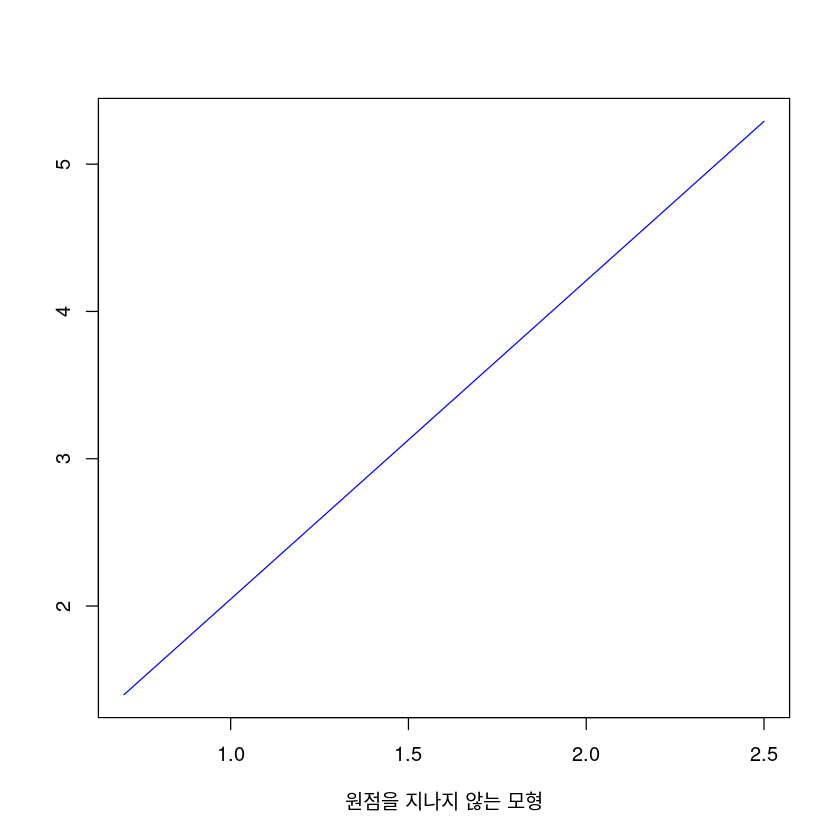

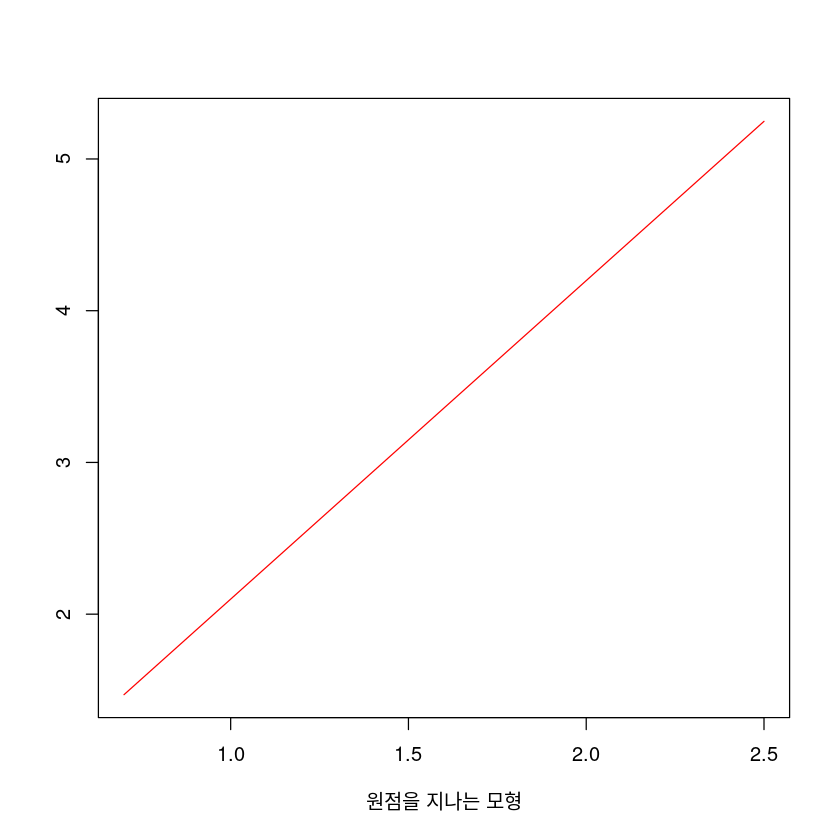

In [70]:
plot(beta0 + beta1*x~x,
     data = dt,
     xlab = "원점을 지나지 않는 모형",
     ylab = "",
     pch  = 16,
     cex  = 1,type='l',
     col  = "blue")
plot(beta1_0*x~x,
     data = dt,
     xlab = "원점을 지나는 모형",
     ylab = "",
     pch  = 16,
     cex  = 1,type='l',
     col  = "red")

- 선형성 만족

In [71]:
epsilon = dt$y - beta0 + beta1*dt$x
epsilon_0 = dt$y - beta1_0*dt$x

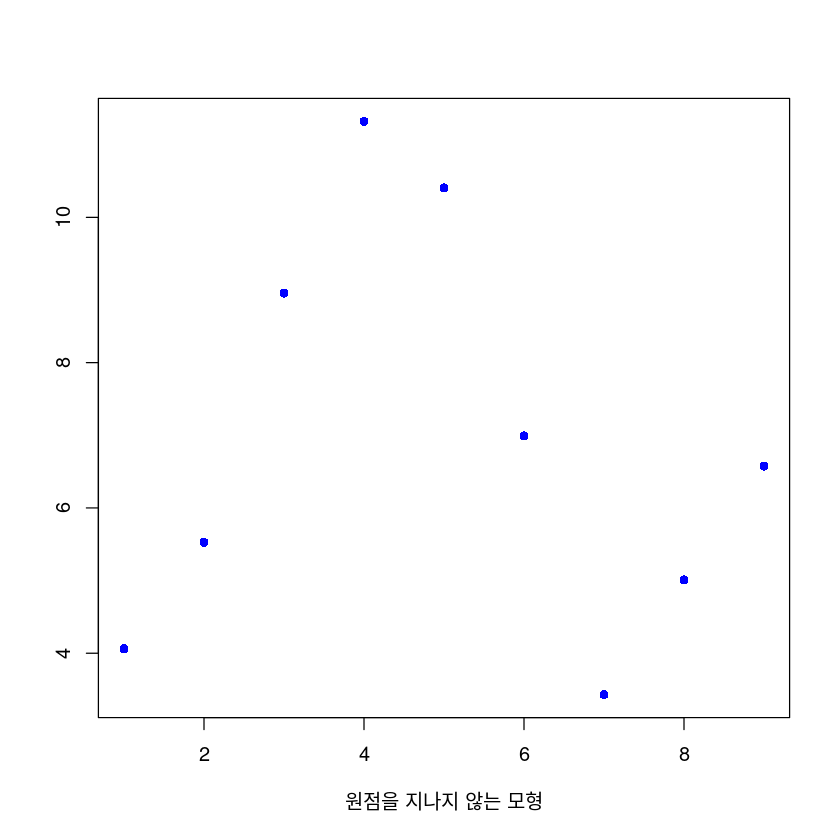

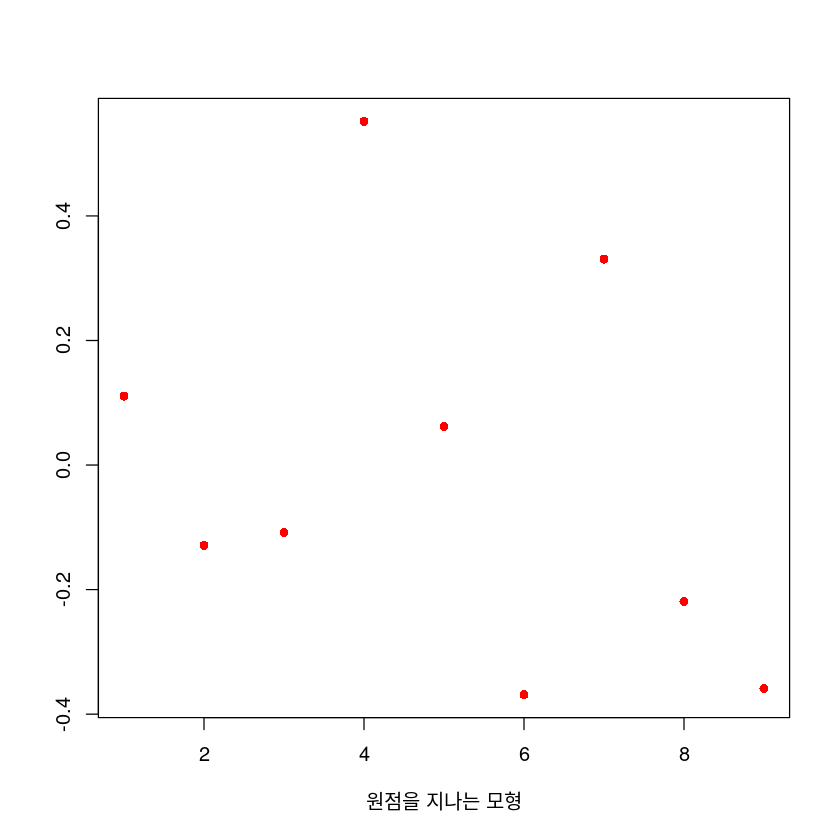

In [72]:
plot(epsilon,
     xlab = "원점을 지나지 않는 모형",
     ylab = "",
     pch  = 16,
     cex  = 1,
     col  = "blue")
plot(epsilon_0,
     xlab = "원점을 지나는 모형",
     ylab = "",
     pch  = 16,
     cex  = 1,
     col  = "red")

- 원점을 지나지 않는 모형이 한쪽 부호에 머무는 경향이 있어보인다.(독립성을 만족하지 않을 수 있다.)
- 원점을 지나는 모형은 그러한 경향이 없고, 등분산성을 만족하는 것처럼 보인다.

In [73]:
shapiro.test(beta0 + beta1*dt$x)


	Shapiro-Wilk normality test

data:  beta0 + beta1 * dt$x
W = 0.95279, p-value = 0.7207


In [74]:
shapiro.test(beta1_0*dt$x)


	Shapiro-Wilk normality test

data:  beta1_0 * dt$x
W = 0.95279, p-value = 0.7207


- 두 모형 모두 정규성 가정을 만족했다.

ANOVA table 비교

|y=beta0+beta1x|df|sum of square|mean of square| F value| p value|
|:---:|:---:|:---:|:---:|:---:|:---:|
|x|1|15.24617|15.24617|141.1584|1.614672e-07|
|Residuals|7|0.7560522|0.1080075|||

|y=beta1x|df|sum of square|mean of square| F value| p value|
|:---:|:---:|:---:|:---:|:---:|:---:|
|x|1|115.89906559088|115.89906559088|1202.60806139735|1.728622e-12|
|Residuals|8|0.77098479088|0.09637309886|||

3. (강의노트 CH04, p9) 다음이 성립함을 증명하시오.

$$\hat{beta}_0 ~ N\big( \beta_0 , \sigma^2\big( \frac{1}{n} + \frac{\bar{x}^2}{S_{(xx)}} \big) \big)$$

**Answer**

$\hat{\beta_0}$

$= \bar{y} - \hat{\beta_1} \bar{x} = \bar{y} - \frac{S_{xy}}{S_{xx}}\bar{x}$

$= \bar{y} - \frac{\sum(x_i - \bar{x})(y_i - \bar{y})}{S_{xx}}\bar{x}$

$= \bar{y} - \sum\frac{(x_i-\bar{x})y_i\bar{x}-(x_i - \bar{x})\bar{y}\bar{x}}{S_{xx}}$

$= \bar{y} - \sum\frac{(x_i - \bar{x})}{S_{xx}}y_i\bar{x} - \frac{\bar{x}\bar{y}}{S_{xx}}\sum(s_i - \bar{x})$

$= \bar{y} - \sum\frac{(s_i - \bar{x})}{S_{xx}}y_i\bar{x}$

$\approx \bar{y} - \sum a_iy_i\bar{x}$

$E(\hat{\beta_0})$

$=\bar{y} - \bar{x}\sum a_i E(y_i)$

$=\bar{y} - \bar{x}\sum a_i (\beta_0 + \beta_1 x_i)$

$=\bar{y} - (\beta_0\bar{x}\sum a_i + \beta_1 \bar{x} \sum a_i x_i)$

$=\bar{y} - \beta_1\bar{x} = \beta_0$

$\star \sum a_i = \sum\frac{x_i - \bar{x}}{S_{xx}} = \frac{1}{S_{xx}}\sum(x_i-\bar{x} )= 0$

$\star \sum a_i x_i = \sum\frac{(x_i - \bar{x})x_i}{S_{xx}}= \frac{1}{S_{xx}} \sum(x_i - \bar{x}(x_i - \bar{x} + \bar{x} = \frac{1}{S_{xx}} \sum(x_i - \bar{x})^2 = 1$

$Var(\hat{\beta_0})$

$=Var(\bar{y} - \bar{x}\sum a_i x_i)$

$=var(\frac{y_i}{n} - \bar{x}\sum a_i y_i)$

$=\frac{\sigma^2}{n} - \bar{x}^2\sigma^2\sum a_i^2$

$ = \frac{\sigma^2}{n} - \frac{\bar{x}^2\sigma^2}{S_{xx}}$

$= \sigma^2(\frac{1}{n} - \frac{\bar{x}^2}{S_{xx}})$

$\star \sum a_i^2 = \sum\frac{(x_i - \bar{x})^2}{S_{xx}} = \frac{1}{S_{xx}^2}\sum(x_i - \bar{x})^2 = \frac{1}{S_{xx}}$